<a href="https://colab.research.google.com/github/samhithaPeddireddy/Samhitha_Info5502_Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

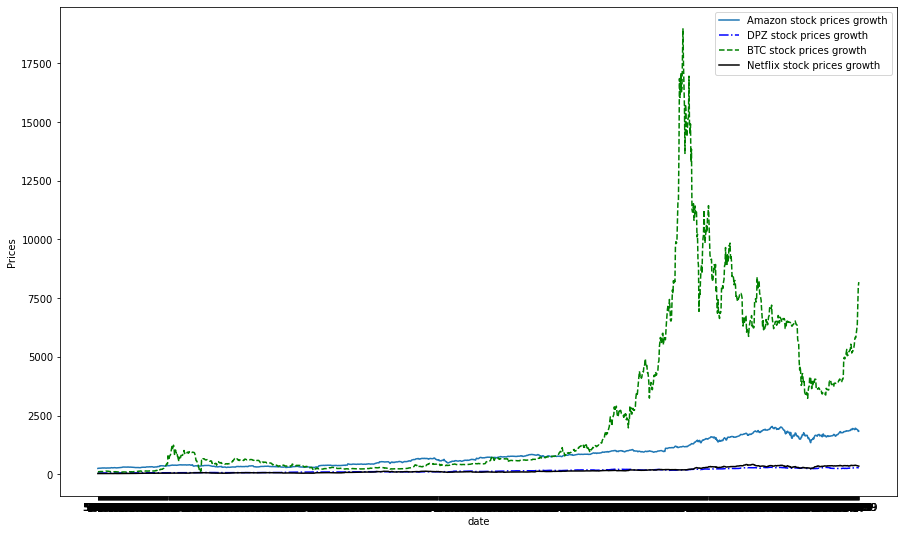

In [2]:
### Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data1=pd.read_csv('/content/stockprediction.csv')
df1=pd.DataFrame(data1)
df1.head
#data1.columns

#plt.plot(df1['Date'],df1['AMZN'],color="red", label="Amazon stock prices growth",linestyle="-")
#plt.plot(df1['Date'],df1['DPZ'] , color="blue", label="DPZ stock prices growth",linestyle="-.")
#plt.plot(df1['Date'],df1['BTC'], color="green", label="BTC stock prices growth",linestyle="--")
#plt.plot(df1['Date'],df1['NFLX'], color="black", label="Netflix stock prices growth")
#PLOTTING GRAPHS OF STOCK PRICES OF GIVEN COMPANIES
fig, ax = plt.subplots(figsize=[15, 9])

ax.plot(df1['Date'],df1['AMZN'], label="Amazon stock prices growth")
ax.plot(df1['Date'],df1['DPZ'] , color="blue", label="DPZ stock prices growth",linestyle="-.")
ax.plot(df1['Date'],df1['BTC'], color="green", label="BTC stock prices growth",linestyle="--")
ax.plot(df1['Date'],df1['NFLX'], color="black", label="Netflix stock prices growth")
#plt.xticks(rotation=90)
ax.set_xlabel('date')
ax.set_ylabel('Prices')
plt.legend()
plt.show()












In [3]:
#CALCULATING MOVING AVERAGE  OF PREVIOUS 4 AND 10 DAYS 
df1['4dayEWM_AMZN'] = df1['AMZN'].ewm(span=4, adjust=False).mean()
df1['10dayEWM_AMZN'] = df1['AMZN'].ewm(span=10, adjust=False).mean()
df1['4dayEWM_DPZ'] = df1['DPZ'].ewm(span=4, adjust=False).mean()
df1['10dayEWM_DPZ'] = df1['DPZ'].ewm(span=10, adjust=False).mean()
df1['4dayEWM_BTC'] = df1['BTC'].ewm(span=4, adjust=False).mean()
df1['10dayEWM_BTC'] = df1['BTC'].ewm(span=10, adjust=False).mean()
df1['4dayEWM_NFLX'] = df1['NFLX'].ewm(span=4, adjust=False).mean()
df1['10dayEWM_NFLX'] = df1['NFLX'].ewm(span=10, adjust=False).mean()

In [38]:
df1.shape

(1520, 13)

In [39]:
df1.dropna(axis=1)

,Date,AMZN,DPZ,BTC,NFLX,4dayEWM_AMZN,10dayEWM_AMZN,4dayEWM_DPZ,10dayEWM_DPZ,4dayEWM_BTC,10dayEWM_BTC,4dayEWM_NFLX,10dayEWM_NFLX
0,5/1/13,248.229996,51.190983,106.250000,30.415714,248.229996,248.229996,51.190983,51.190983,106.250000,106.250000,30.415714,30.415714
1,5/2/13,252.550003,51.987320,98.099998,30.641428,249.957999,249.015452,51.509518,51.335772,102.989999,104.768181,30.506000,30.456753
2,5/3/13,258.049988,52.446388,112.900002,30.492857,253.194794,250.658095,51.884266,51.537702,106.954000,106.246694,30.500743,30.463317
3,5/6/13,255.720001,53.205257,109.599998,30.098572,254.204877,251.578441,52.412662,51.840894,108.012399,106.856386,30.339874,30.397000
4,5/7/13,257.730011,54.151505,113.199997,29.464285,255.614931,252.696909,53.108199,52.261005,110.087438,108.009770,29.989639,30.227415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,5/8/19,1917.770020,283.149994,6171.959961,364.369995,1926.472707,1920.947742,279.943273,276.038624,5969.238171,5723.005168,371.223551,372.821424
1516,5/9/19,1899.869995,282.160004,6358.290039,362.750000,1915.831622,1917.115424,280.829966,277.151603,6124.858918,5838.511508,367.834131,370.990256
1517,5/10/19,1889.979980,278.369995,7191.359863,361.040009,1905.490965,1912.181707,279.845977,277.373128,6551.459296,6084.483937,365.116482,369.181120
1518,5/13/19,1822.680054,273.880005,7980.129883,345.260010,1872.366601,1895.908679,277.459588,276.738015,7122.927531,6429.146836,357.173893,364.831827


In [200]:
df1.shape

(1520, 14)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics

# Create Regression Model
model1 = LinearRegression()
#SPLITTING DATA TO TEST AND TRAIN and feeding the data to machine and predicting price based on 4 day moving average for amazon
X_train, X_test, y_train, y_test = train_test_split( df1[['4dayEWM_AMZN']], df1[['AMZN']], test_size=.2, random_state=0)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))



Mean Absolute Error: 7.338549849173468
Coefficient of Determination: 0.9994202861641965


In [26]:
#SPLITTING DATA TO TEST AND TRAIN and feeding the data to machine and predicting price based on 4 day moving average for DPZ
X_train_dpz, X_test_dpz, y_train_dpz, y_test_dpz = train_test_split( df1[['4dayEWM_DPZ']], df1[['DPZ']], test_size=.2, random_state=0)
model1.fit(X_train_dpz,y_train_dpz)
y_pred_dpz = model1.predict(X_test_dpz)
print("Mean Absolute Error:", mean_absolute_error(y_test_dpz, y_pred_dpz))
print("Coefficient of Determination:", r2_score(y_test_dpz, y_pred_dpz))

Mean Absolute Error: 1.2333624472456146
Coefficient of Determination: 0.9991997633800983


In [30]:
#SPLITTING DATA TO TEST AND TRAIN and feeding the data to machine and predicting price based on 4 day moving average for BTC
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split( df1[['4dayEWM_BTC']], df1[['BTC']], test_size=.2, random_state=0)
model1.fit(X_train_BTC,y_train_BTC)
y_pred_BTC = model1.predict(X_test_BTC)
print("Mean Absolute Error:", mean_absolute_error(y_test_BTC, y_pred_BTC))
print("Coefficient of Determination:", r2_score(y_test_BTC, y_pred_BTC))


Mean Absolute Error: 61.95797077005626
Coefficient of Determination: 0.9976764841695271


In [31]:
#SPLITTING DATA TO TEST AND TRAIN and feeding the data to machine and predicting price based on 4 day moving average for NFLX
X_train_NFLX, X_test_NFLX, y_train_NFLX, y_test_NFLX = train_test_split( df1[['10dayEWM_NFLX']], df1[['NFLX']], test_size=.2, random_state=0)
model1.fit(X_train_NFLX,y_train_NFLX)

y_pred_NFLX = model1.predict(X_test_NFLX)
print("Mean Absolute Error:", mean_absolute_error(y_test_NFLX, y_pred_NFLX))
print("Coefficient of Determination:", r2_score(y_test_NFLX, y_pred_NFLX))

Mean Absolute Error: 3.756391218056801
Coefficient of Determination: 0.9963606900252564


In [35]:

y_pred

array([[1586.15269579],
       [ 297.75598339],
       [ 265.11400707],
       [ 358.99608347],
       [ 330.32956154],
       [ 372.16552727],
       [ 315.37075063],
       [ 565.77474617],
       [ 669.42365814],
       [ 655.72531566],
       [ 577.96546335],
       [ 359.91848071],
       [ 764.82190162],
       [ 656.15845799],
       [1696.60195888],
       [ 307.44890762],
       [ 953.24765297],
       [1685.01069968],
       [ 278.76765377],
       [ 305.83362971],
       [ 383.64841239],
       [ 309.67298599],
       [ 764.68825871],
       [ 384.11545786],
       [ 625.48891317],
       [ 351.19546536],
       [ 514.38648311],
       [ 579.24027981],
       [ 842.9730565 ],
       [ 321.62960864],
       [ 303.54466055],
       [ 949.90792969],
       [ 848.8693552 ],
       [ 765.21525078],
       [1649.12038568],
       [ 374.19776104],
       [1453.6362021 ],
       [ 983.4988873 ],
       [1918.85456873],
       [1639.37840907],
       [1165.16984793],
       [ 372.592

In [32]:
y_pred_dpz

array([[224.4853742 ],
       [ 83.66314879],
       [ 54.81785523],
       [ 70.97859599],
       [ 70.54674716],
       [ 97.24521097],
       [ 68.42032764],
       [128.95444143],
       [106.51197783],
       [100.00772368],
       [103.58840915],
       [ 65.21075869],
       [142.17968414],
       [ 99.71303718],
       [280.93018335],
       [ 94.64565105],
       [177.61280998],
       [281.60310443],
       [ 56.46329712],
       [ 59.78649372],
       [ 95.76176355],
       [ 90.33085056],
       [145.55707153],
       [ 99.27411657],
       [134.32857917],
       [ 95.13995726],
       [104.33068234],
       [102.94847881],
       [182.84394113],
       [ 74.13438176],
       [ 59.75097221],
       [192.18320756],
       [185.26551705],
       [160.57562581],
       [279.42599559],
       [ 97.77584893],
       [215.877883  ],
       [207.93421841],
       [281.15068288],
       [266.33969675],
       [179.1932475 ],
       [ 75.42963244],
       [190.26104672],
       [ 59

In [36]:
y_pred_BTC

array([[ 8922.95601259],
       [  359.33877758],
       [  117.93804502],
       [  628.60944656],
       [  626.38707815],
       [  253.75894831],
       [  595.49730821],
       [  421.38645588],
       [  441.89244072],
       [  339.2011162 ],
       [  411.72320649],
       [  937.26338342],
       [  588.42364281],
       [  340.13148401],
       [ 6242.57810902],
       [  256.27179805],
       [ 4497.49727814],
       [ 6081.93652733],
       [  112.43120888],
       [   97.21441206],
       [  232.31063313],
       [  358.22840181],
       [  580.87306674],
       [  260.46170675],
       [  435.10368241],
       [  238.21463127],
       [  238.72742793],
       [  409.49328928],
       [ 1035.57286444],
       [  365.05108063],
       [  109.41399671],
       [ 3972.76175052],
       [ 1253.75408478],
       [  741.42949757],
       [ 3460.24140778],
       [  279.74914226],
       [10343.62972961],
       [ 2471.56044956],
       [ 6140.15797411],
       [ 6139.71531064],


In [37]:
y_pred_NFLX

array([[315.97923389],
       [ 56.27589011],
       [ 31.72957846],
       [ 63.98673231],
       [ 64.99308623],
       [ 60.84171511],
       [ 61.73001791],
       [ 97.43052246],
       [119.62221985],
       [113.43557981],
       [109.20199339],
       [ 56.42487319],
       [ 94.28628048],
       [109.84460589],
       [395.93465355],
       [ 57.72809654],
       [169.70731733],
       [396.21918514],
       [ 32.28228028],
       [ 36.41505229],
       [ 64.44613604],
       [ 49.78430727],
       [ 96.79998719],
       [ 68.24002371],
       [108.01668949],
       [ 61.90627053],
       [118.19475683],
       [110.55965206],
       [143.0970588 ],
       [ 65.0732113 ],
       [ 35.95591521],
       [183.63972564],
       [142.53462658],
       [117.77498927],
       [339.73040609],
       [ 63.10155595],
       [269.79098757],
       [151.59582741],
       [373.01694199],
       [304.82610804],
       [188.57851343],
       [ 63.07617198],
       [177.58154519],
       [ 35

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [183]:
### You code here:
import numpy as np
import pandas as pd
import nltk

train=pd.read_csv('/content/train.csv')
#train_df=pd.DataFrame(train)
test=pd.read_csv('/content/test.csv')
#df1
comb_df=train.append(test,ignore_index=True)
comb_df.shape
test.shape
train.shape






(31962, 3)

In [ ]:
#removing usr handles @user
import re

def list_users_remove(input):
  b = re.findall("@[\w]*", input)
  for i in b:
   input = re.sub(i, '', input)   
  return input   

comb_df['cleaned_tweet'] = np.vectorize(list_users_remove)(comb_df['tweet'])
 

 

In [ ]:
 #for a in b:
  #comb_df['cleaned_tweet'] = re.sub(a, '', i)
comb_df

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."


In [ ]:
#REPLACING SPECIAL CHARACTERS
comb_df['cleaned_tweet'] = comb_df['cleaned_tweet'].str.replace("[^a-zA-Z#\n]", " ")

comb_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio omg am...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

#SPLITTING WORDS IN EACH TWEET
#nltk_tokens = nltk.word_tokenize(word_data)
tokenized_twe=comb_df['cleaned_tweet'].apply(lambda v : v.split())
tokenized_twe

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, #lyft, credit, i, can, t, use, c...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide, society, now, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, a, mermaid, #hairflip, #neverr...
49156    [#hillary, #campaigned, today, in, #ohio, omg,...
49157    [happy, at, work, conference, right, mindset, ...
49158    [my, song, so, glad, free, download, #shoegaze...
Name: cleaned_tweet, Length: 49159, dtype: object

In [ ]:
#USING NLTK LEMMATIZER TO DERIVE THE ROOT WORD
from nltk.stem import WordNetLemmatizer

 
lemmatizer = WordNetLemmatizer()
tokenized_twe=tokenized_twe.apply(lambda x: [lemmatizer.lemmatize(n) for n in x])
#tokenized_tweet = tokenized_twe.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_twe

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, #lyft, credit, i, can, t, use, c...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide, society, now, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, a, mermaid, #hairflip, #neverr...
49156    [#hillary, #campaigned, today, in, #ohio, omg,...
49157    [happy, at, work, conference, right, mindset, ...
49158    [my, song, so, glad, free, download, #shoegaze...
Name: cleaned_tweet, Length: 49159, dtype: object

In [ ]:
tokenized_twe=tokenized_twe.apply(lambda sw: [mn for mn in sw if len(mn)>3])

tokenized_twe

0        [when, father, dysfunctional, selfish, drag, i...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: cleaned_tweet, Length: 49159, dtype: object

In [ ]:
#JOINING THE WORDS TO FORM SENTENCE
for i in range(len(tokenized_twe)):
    tokenized_twe[i] = ' '.join(tokenized_twe[i])
    #print(i)
comb_df['cleaned_tweet'] = tokenized_twe

In [ ]:
comb_df

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drag into dy...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used word lik...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...


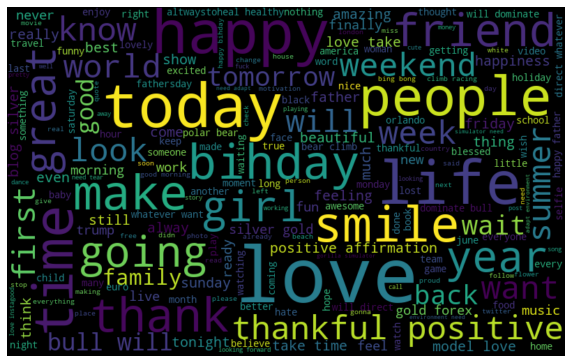

In [ ]:
#PLOTTING WORDCLOUD FOR ALL THE WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(text for text in comb_df['cleaned_tweet'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

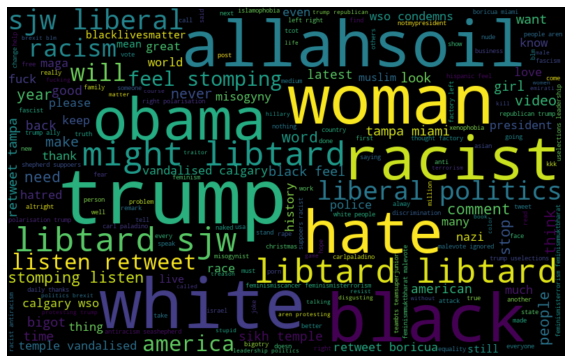

In [ ]:
#negative words visualization
neg_words= ' '.join(nw for nw in comb_df['cleaned_tweet'][comb_df['label']==1])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#PRINTING HASHTAGS FOM SENTENCES THAT CONTAIN NEGATIVE WORDS
import re

hashtag1=[]
def hashtags(input1):
  for i in input1:
    #for j in i.split():
     #print(j)
     b = re.findall("#(\w+)", i)
     hashtag1.append(b)
  return hashtag1  
      

neg_hash=hashtags(comb_df['cleaned_tweet'][comb_df['label']==1])

neg_hash= [item for l in neg_hash for item in l]
neg_hash





 

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'med',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflict',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officer',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'praised',
 'cleveland',
 'rnc',
 'white',
 'tamirrice

In [ ]:
from nltk.probability import FreqDist
import seaborn as sns

In [ ]:
#negative hashtags
#TOP 25 hashwords and their count
b = nltk.FreqDist(neg_hash)
f1=FreqDist(b)
f2=pd.DataFrame(f1.most_common(25))  
print(f2)


            0    1
0       trump  136
1    politics   95
2   allahsoil   92
3     libtard   76
4     liberal   75
5         sjw   74
6     retweet   63
7       miami   46
8       black   44
9        hate   33
10      tampa   32
11      bigot   28
12        blm   28
13   hispanic   28
14     brexit   27
15       sikh   27
16    calgary   27
17     temple   26
18        wso   26
19      obama   26
20    teambts   26
21       maga   25
22   malevote   24
23    boricua   24
24   misogyny   23


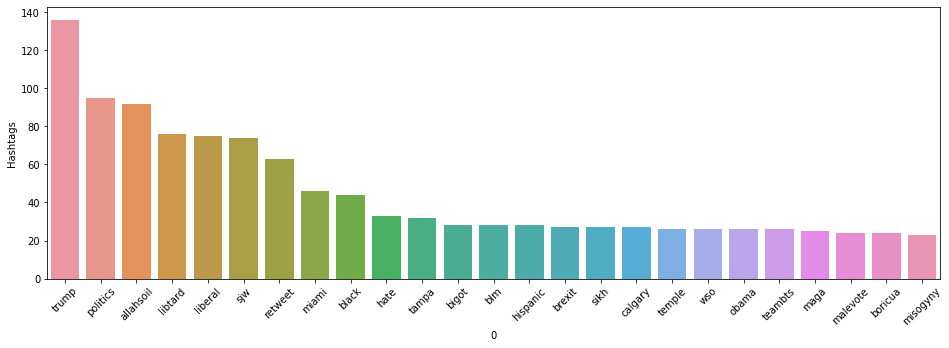

In [ ]:
#plotting top 25 hashwords
plt.figure(figsize=(16,5))
ax = sns.barplot(data=f2, x= f2[0], y = f2[1])
ax.set(ylabel = 'Count')
ax.set(ylabel = 'Hashtags')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

In [ ]:
#converting the words to numerics using tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(comb_df['cleaned_tweet'])

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#as we have combined the training and test data earlier,splitting based on rows of training set
tra_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
ytrain, yvalid = train_test_split(train['label'], random_state=0, test_size=0.2)

model = LogisticRegression()
xtrain_tfidf = tra_tfidf[ytrain.index]
xtest_tfidf = tra_tfidf[yvalid.index]

model.fit(xtrain_tfidf, ytrain)

prediction = model.predict(xtest_tfidf)
#prediction_int = prediction[:,1] >= 0.3
#prediction_int = prediction_int.astype(np.int)

f1_score=f1_score(yvalid, prediction)
accuracy_score_n= accuracy_score(yvalid, prediction)
precision_score=precision_score(yvalid, prediction)
recall_score=recall_score(yvalid, prediction)
print("F1 Score is:" ,f1_score )
print("Accuracy Score is:" ,accuracy_score_n )
print("Accuracy Percentage is:" ,accuracy_score_n*100 )
print("Precision score is:" ,precision_score )
print("Recall score is:" ,recall_score )

F1 Score is: 0.4724137931034482
Accuracy Score is: 0.9521351478179259
Accuracy Percentage is: 95.21351478179258
Precision score is: 0.7965116279069767
Recall score is: 0.33578431372549017
